In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
import weather_routing
import plot_isochron_routes
import pandas
import math

In [15]:
year = 2022
##################
min_lat = 21.1
max_lat = 34.1
max_lng = -118
min_lng = -158
# Waypoints for the TransPac 
waypoints = pandas.DataFrame([
    (33.69853, -118.25085, 'Pt. Fermin Bouy'),
    (33.48177, -118.64101, 'Catalina West End'),
    (21.24296, -157.81775, 'Diamond Head Bouy'),
            ], columns=['lat', 'lng', 'name'])
# July 1st, 12:00 PST
Start_Date = f"{year}0701"
Start_Time = 19 #19:00 UTC
##################
#grib_files_dir = "historical_gribs/2024"
wind_data_dir = f"historical_wind_data/{year}"

In [16]:
waypoints

lat        lng               name
0  33.69853 -118.25085    Pt. Fermin Bouy
1  33.48177 -118.64101  Catalina West End
2  21.24296 -157.81775  Diamond Head Bouy

In [18]:
rhumb_route = weather_routing.route_shortest_path(waypoints, hour_offset=0, start_date=Start_Date, start_time=Start_Time, 
                        wind_data_dir=wind_data_dir,gps_bounds=None,
                        max_deg_deviation_from_rhumb=90)

Pt. Fermin Bouy at 2022-07-01 11:00:00-07:00
starting time: 20220701 18 2022-07-01 11:00:00-07:00
0: twa=149.5 mag=218.1 dtg=18.2 sog=5.6
1: twa=151.4 mag=223.9 dtg=12.4 sog=6.3
2: twa=165 mag=241.6 dtg=6.8 sog=5.7
3: twa=180 mag=256.4 dtg=1.7 sog=5.2
Catalina West End at 2022-07-01 15:00:00-07:00
starting time: 20220701 18 2022-07-01 15:00:00-07:00
4: twa=151.4 mag=288.4 dtg=2195.3 sog=6.3
5: twa=151.4 mag=288.0 dtg=2189.7 sog=6.3
6: twa=150 mag=284.7 dtg=2183.8 sog=6.4
7: twa=150 mag=281.0 dtg=2177.8 sog=6.4
8: twa=135 mag=291.6 dtg=2171.6 sog=7.3
9: twa=135 mag=285.9 dtg=2165.1 sog=7.3
10: twa=135 mag=282.9 dtg=2158.4 sog=7.3
11: twa=135 mag=283.5 dtg=2151.7 sog=7.3
12: twa=135 mag=283.8 dtg=2145.1 sog=7.3
13: twa=135 mag=284.1 dtg=2138.5 sog=7.3
14: twa=135 mag=284.8 dtg=2131.9 sog=7.3
15: twa=135 mag=282.1 dtg=2125.8 sog=6.6
16: twa=135 mag=282.7 dtg=2119.8 sog=6.6
17: twa=135 mag=283.0 dtg=2113.1 sog=7.3
18: twa=135 mag=285.3 dtg=2107.3 sog=6.6
19: twa=135 mag=281.8 dtg=2101.2 so

OutOfBoundsException: could not find index for lat/lng= 34.2620525067504,-122.48444165904019

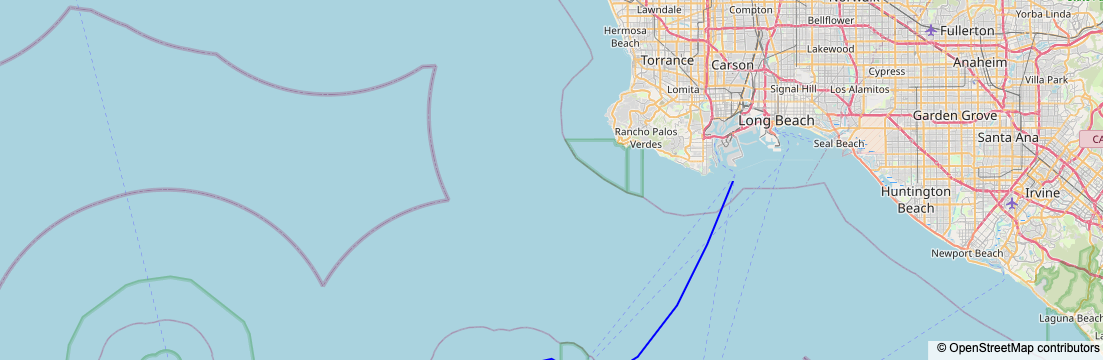

In [28]:
plot_isochron_routes.plot_isochron_routes(rhumb_route=rhumb_route)

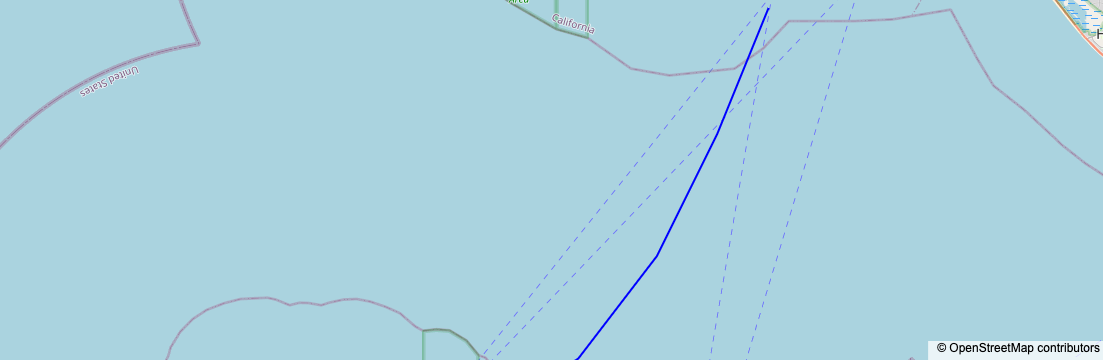

In [34]:
plot_isochron_routes.plot_route(rhumb_route, color='blue')

In [20]:
isochrons = weather_routing.route_isochrons(waypoints,start_date=Start_Date, start_time=Start_Time, wind_data_dir=wind_data_dir,
                                           max_step_debug=550)

========== routing to waypoint 1 ===========
t=1 dtw=18.216 sog=5.610 #routes=9 time=0.01
t=2 dtw=12.359 sog=6.320 #routes=19 time=0.02
t=3 dtw=6.667 sog=6.400 #routes=26 time=0.03
t=4 dtw=1.020 sog=5.660 #routes=26 time=0.10 === found waypoint
========== routing to waypoint 2 ===========
t=5 dtw=2193.622 sog=6.320 #routes=16 time=0.02
t=6 dtw=2193.605 sog=6.320 #routes=12 time=0.01
t=7 dtw=2187.783 sog=6.400 #routes=24 time=0.03
t=8 dtw=2187.612 sog=6.400 #routes=26 time=0.03
t=9 dtw=2181.555 sog=7.280 #routes=37 time=0.05
t=10 dtw=2181.044 sog=7.280 #routes=41 time=0.06
t=11 dtw=2174.836 sog=7.280 #routes=47 time=0.09
t=12 dtw=2174.358 sog=7.280 #routes=56 time=0.11
t=13 dtw=2168.172 sog=7.280 #routes=58 time=0.14
t=14 dtw=2167.710 sog=7.280 #routes=66 time=0.19
t=15 dtw=2161.564 sog=7.280 #routes=71 time=0.18
t=16 dtw=2160.966 sog=7.280 #routes=83 time=0.23
OutOfBoundsException 34.282220537192174,-118.68144318277982
t=17 dtw=2155.495 sog=6.590 #routes=82 time=0.24
t=18 dtw=2154.276 

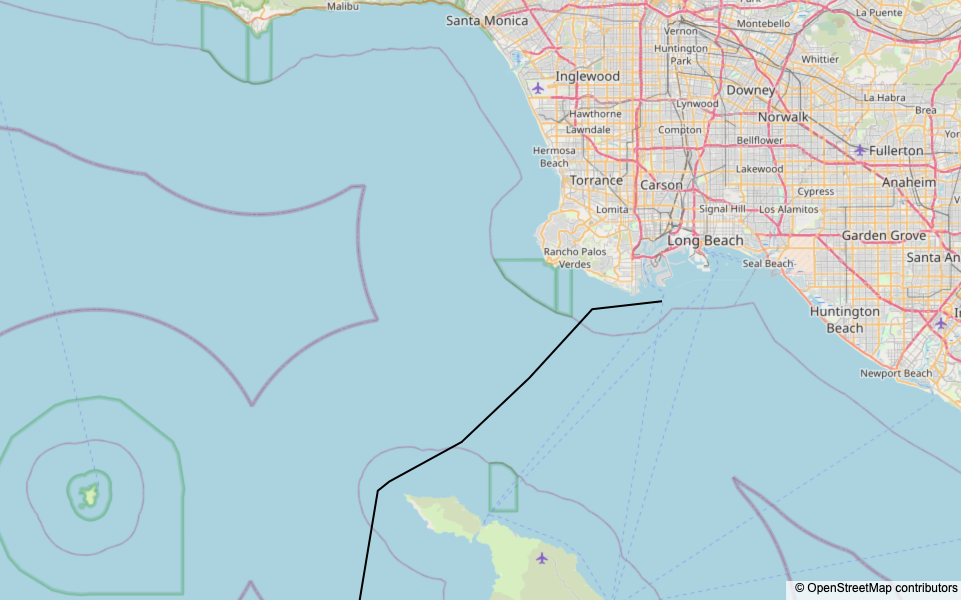

In [23]:
#plot_isochron_routes.plot_isochron_routes(isochrons=isochrons, waypoints=waypoints, min_route=isochrons[-1][0])
plot_isochron_routes.plot_isochron_routes(min_route=isochrons[-1][0])

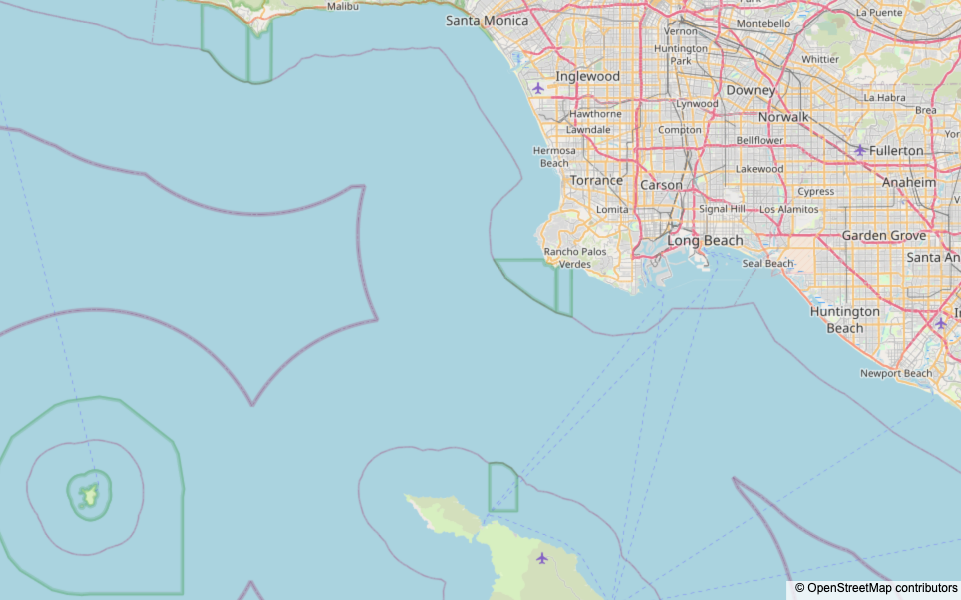

In [24]:
plot_isochron_routes.plot_isochron_routes(isochrons=isochrons[-3:-1])


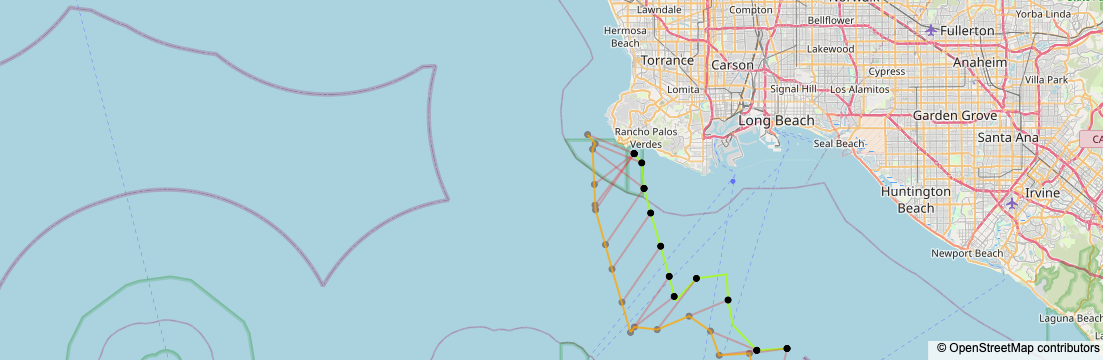

In [73]:
plot_isochron_routes.plot_isochron_routes(isochrons=isochrons[2:4], waypoints=waypoints)